In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [3]:
pais = ["Puerto Rico"]
df_filtrado = df[df["Entity"].isin(pais)]

In [4]:
# Verificando se está pegando o pais de escolha
print(df_filtrado.head())

             Entity Code  year         Day  Average surface temperature daily  \
145860  Puerto Rico  PRI  1940  1940-01-15                          23.097775   
145861  Puerto Rico  PRI  1940  1940-02-15                          23.083357   
145862  Puerto Rico  PRI  1940  1940-03-15                          23.126715   
145863  Puerto Rico  PRI  1940  1940-04-15                          24.353450   
145864  Puerto Rico  PRI  1940  1940-05-15                          24.394053   

        Average surface temperature monthly  
145860                            24.265465  
145861                            24.265465  
145862                            24.265465  
145863                            24.265465  
145864                            24.265465  


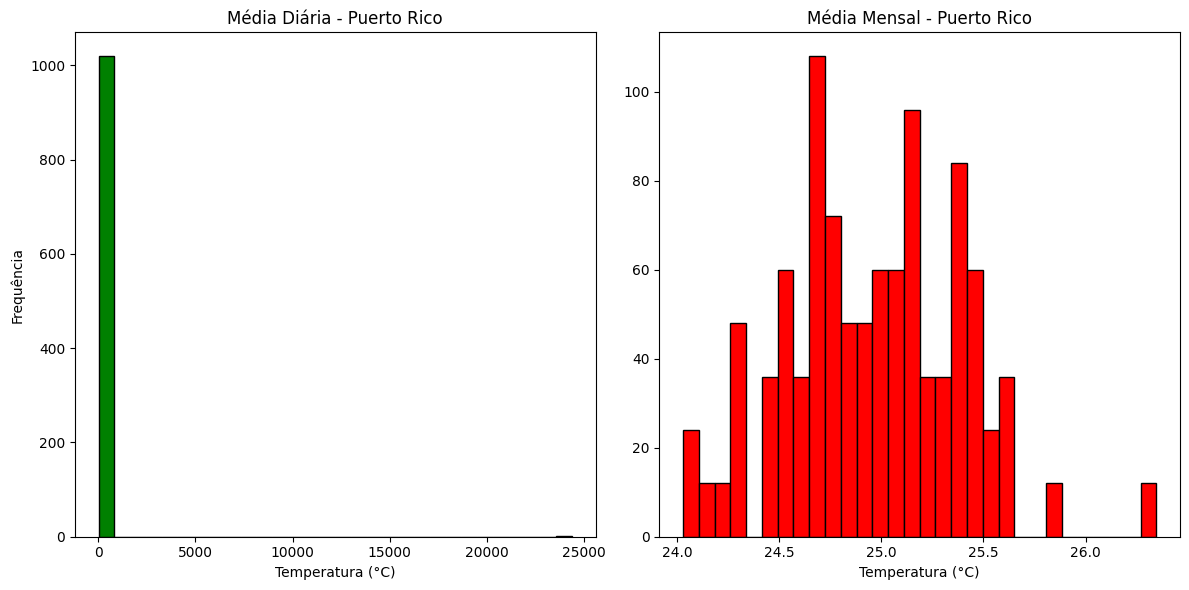

In [5]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Puerto Rico", df_filtrado)

In [6]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(df_filtrado['Average surface temperature daily'], 1.5)
outliers_mensal = identificar_outliers(df_filtrado['Average surface temperature monthly'], 1.5)

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 146615    24361.0
Name: Average surface temperature daily, dtype: float64

Outliers mensais:
 146868    26.346703
146869    26.346703
146870    26.346703
146871    26.346703
146872    26.346703
146873    26.346703
146874    26.346703
146875    26.346703
146876    26.346703
146877    26.346703
146878    26.346703
146879    26.346703
Name: Average surface temperature monthly, dtype: float64


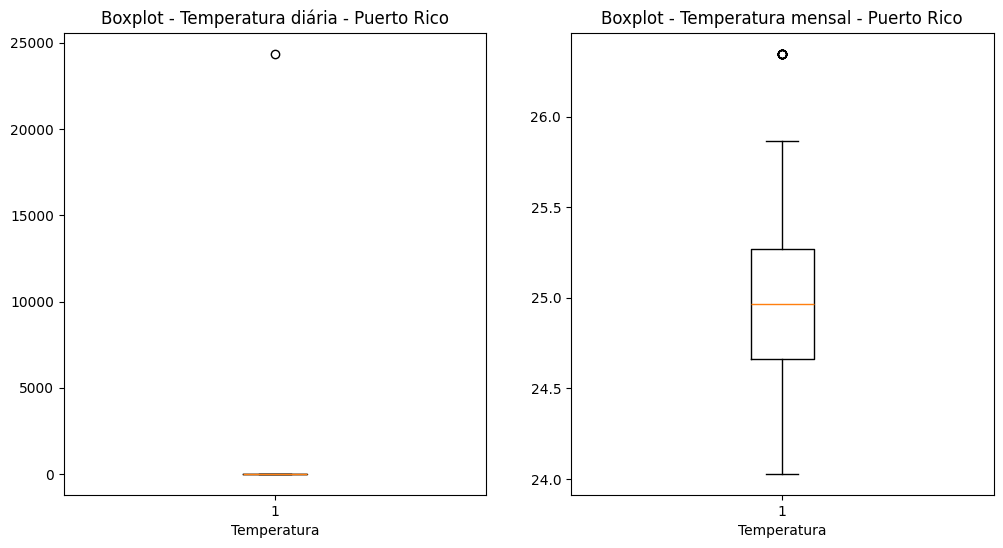

In [7]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Puerto Rico", df_filtrado)

In [8]:
# Importar método de remover outliers
from Funcoes import remover_outliers

# Remover outliers
temperatura_diaria_correta = remover_outliers(df_filtrado['Average surface temperature daily'], 1.5)
temperatura_mensal_correta = remover_outliers(df_filtrado['Average surface temperature monthly'], 1.5)

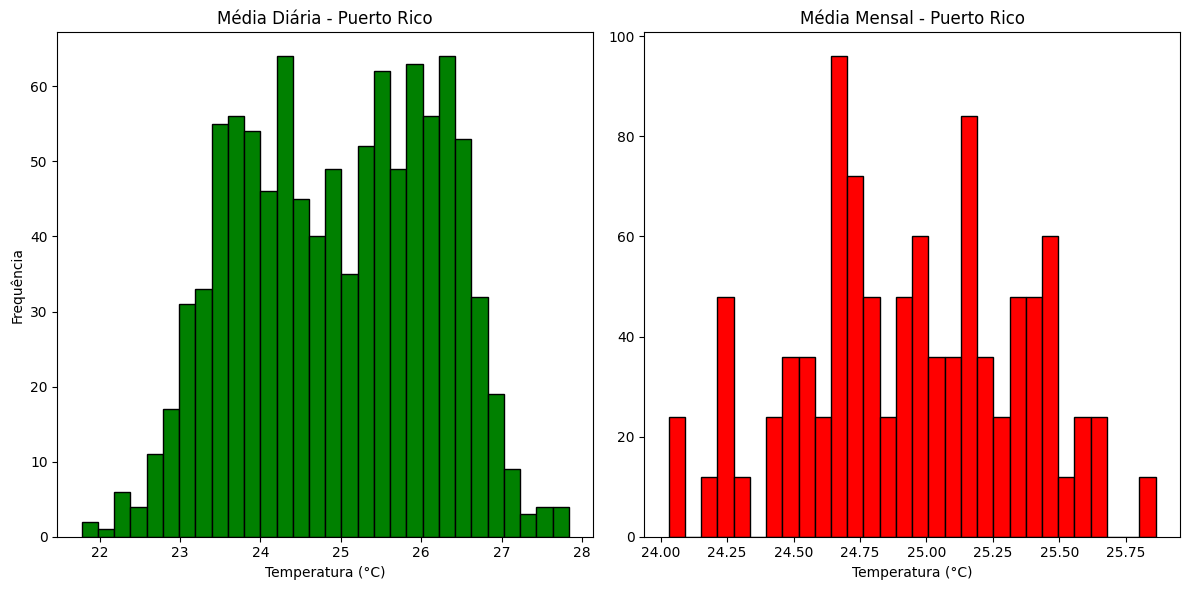

In [9]:
# Criar dataframe com os dados sem outliers
dados_pais_correto = pd.DataFrame({
    'Entity': 'Puerto Rico',
    'Day': df_filtrado['Day'],
    'Average surface temperature daily': temperatura_diaria_correta,
    'Average surface temperature monthly': temperatura_mensal_correta
})

# Gerar histograma do pais selecionado sem outliers
gerar_histogramas('Puerto Rico', dados_pais_correto)

In [10]:
# Importar metódo de análise de periodo
from Funcoes import analisar_periodo

mes_inicial, mes_final = analisar_periodo(dados_pais_correto, 'Day')

print("-" * 100)


Período de análise:
Primeiro mês: 1940-01
Último mês: 2024-12
----------------------------------------------------------------------------------------------------


In [11]:
# Importar função para identificação de meses faltantes
from Funcoes import identificar_meses_faltantes

identificar_meses_faltantes(dados_pais_correto, 'Day')
print("_" * 100)  

Numero de meses faltante: 0
Meses faltante: 
____________________________________________________________________________________________________
